In [8]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:


# Tentukan path ke dataset di Google Drive
dataset_path = '/content/sample_data/Mall_Customers.csv'

# Baca dataset sebagai DataFrame
df = pd.read_csv(dataset_path)

# Tampilkan beberapa baris awal dataset
print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [10]:
# Menggunakan metode .rename() untuk mengubah nama atribut
df = df.rename(columns={
    'Annual Income (k$)': 'Annual Income',
    'Spending Score (1-100)': 'Spending Score'
})

# Tampilkan DataFrame setelah mengubah nama atribut
print(df.head())


   CustomerID  Gender  Age  Annual Income  Spending Score
0           1    Male   19             15              39
1           2    Male   21             15              81
2           3  Female   20             16               6
3           4  Female   23             16              77
4           5  Female   31             17              40


In [11]:
# Menghapus kolom "CustomerID" dan "Gender"
df = df.drop(columns=['CustomerID', 'Gender'])

# Tampilkan DataFrame setelah menghapus kolom
print(df.head())


   Age  Annual Income  Spending Score
0   19             15              39
1   21             15              81
2   20             16               6
3   23             16              77
4   31             17              40


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

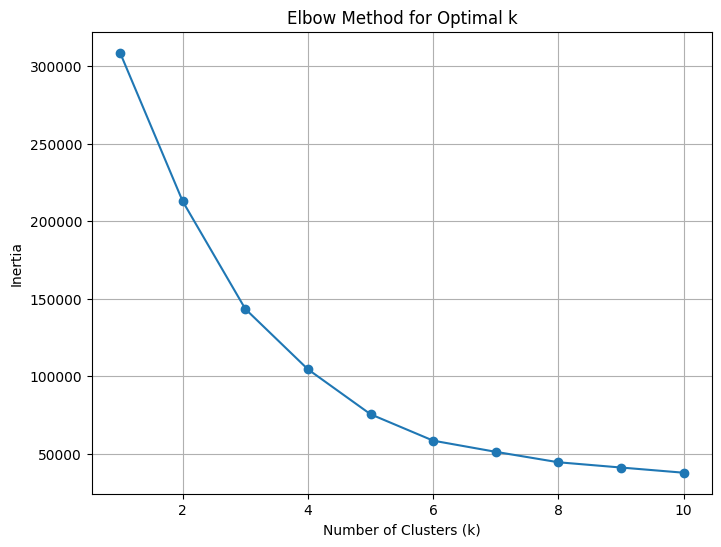

In [12]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengambil kolom 'Age', 'Annual Income', dan 'Spending Score' dari DataFrame
X = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi daftar kosong untuk nilai inersia
inertia = []

# Mencoba jumlah kluster (k) dari 1 hingga 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Memvisualisasikan Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


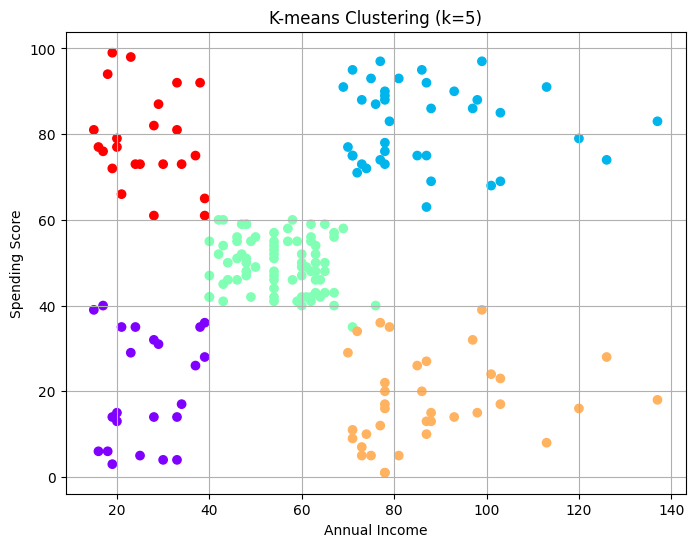

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengambil kolom 'Age', 'Annual Income', dan 'Spending Score' dari DataFrame
X = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-means dengan 5 kluster
kmeans = KMeans(n_clusters=5, random_state=0)
df['label'] = kmeans.fit_predict(X)

# Memvisualisasikan hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['label'], cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering (k=5)')
plt.grid()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


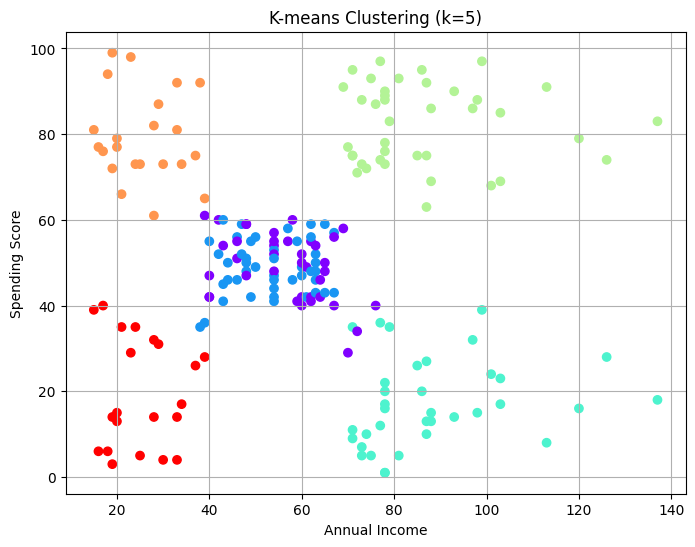

In [14]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Mengambil kolom 'Age', 'Annual Income', dan 'Spending Score' dari DataFrame
X = df[['Age', 'Annual Income', 'Spending Score']]

# Membuat model K-means dengan 5 kluster
kmeans = KMeans(n_clusters=6, random_state=0)
df['label'] = kmeans.fit_predict(X)

# Memvisualisasikan hasil clustering
plt.figure(figsize=(8, 6))
plt.scatter(df['Annual Income'], df['Spending Score'], c=df['label'], cmap='rainbow')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('K-means Clustering (k=5)')
plt.grid()
plt.show()


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Mengambil kolom 'Age', 'Annual Income', dan 'Spending Score' dari DataFrame
X = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi daftar kosong untuk Silhouette Scores
silhouette_scores = []

# Menghitung Silhouette Score untuk k=2 hingga k=10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Menampilkan hasil Silhouette Score
for k, score in zip(range(2, 11), silhouette_scores):
    print(f'Silhouette Score for k={k}: {score}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Silhouette Score for k=2: 0.293166070535953
Silhouette Score for k=3: 0.3839349967742105
Silhouette Score for k=4: 0.40546302077733304
Silhouette Score for k=5: 0.44428597560893024
Silhouette Score for k=6: 0.4523443947724053
Silhouette Score for k=7: 0.4412807576186172
Silhouette Score for k=8: 0.4280971079746162
Silhouette Score for k=9: 0.40126260157691634
Silhouette Score for k=10: 0.3790978814868016


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Mengambil kolom 'Age', 'Annual Income', dan 'Spending Score' dari DataFrame
X = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi daftar kosong untuk menyimpan nilai Davies-Bouldin Index
davies_bouldin_scores = []

# Mencoba jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    dbi_score = davies_bouldin_score(X, labels)
    davies_bouldin_scores.append(dbi_score)

# Menampilkan nilai Davies-Bouldin Index untuk setiap k
for k, score in zip(range(2, 11), davies_bouldin_scores):
    print(f'k={k}: Davies-Bouldin Index = {score}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

k=2: Davies-Bouldin Index = 1.3571023143309133
k=3: Davies-Bouldin Index = 0.8748062648492879
k=4: Davies-Bouldin Index = 0.8914904209843165
k=5: Davies-Bouldin Index = 0.8218781633199781
k=6: Davies-Bouldin Index = 0.746974007275528
k=7: Davies-Bouldin Index = 0.7863764854525301
k=8: Davies-Bouldin Index = 0.8641438876447516
k=9: Davies-Bouldin Index = 0.9070119449899816
k=10: Davies-Bouldin Index = 0.9573604236246045


In [17]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Mengambil kolom 'Age', 'Annual Income', dan 'Spending Score' dari DataFrame
X = df[['Age', 'Annual Income', 'Spending Score']]

# Inisialisasi daftar kosong untuk nilai CH Index
ch_scores = []

# Mencoba jumlah kluster (k) dari 2 hingga 10
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    labels = kmeans.fit_predict(X)
    ch_score = calinski_harabasz_score(X, labels)
    ch_scores.append(ch_score)

# Menampilkan nilai CH Index untuk setiap k
for k, score in zip(range(2, 11), ch_scores):
    print(f'k={k}: CH Index = {score}')


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

k=2: CH Index = 89.28096999467428
k=3: CH Index = 113.70507138642179
k=4: CH Index = 127.9838294818919
k=5: CH Index = 151.04386000160667
k=6: CH Index = 166.7204931788687
k=7: CH Index = 162.2852042279988
k=8: CH Index = 163.58062876554533
k=9: CH Index = 156.15508760692356
k=10: CH Index = 152.26426170758603


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
